In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv('tuma/tuma/wine.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [15]:
top_countries = df['country'].value_counts().nlargest(5).index
df_filtered = df[df['country'].isin(top_countries)]

In [16]:
# 2. Selecionar colunas (features) para o modelo.
features = ['points', 'price', 'province', 'region_1', 'variety', 'winery']
target = 'country'
df_model = df_filtered[features + [target]].copy()

In [17]:
df_model.dropna(subset=[target], inplace=True)
for col in features:
    if df_model[col].dtype == 'object':
        df_model[col].fillna(df_model[col].mode()[0], inplace=True)
    else:
        df_model[col].fillna(df_model[col].median(), inplace=True)

C:\Users\rafam\AppData\Local\Temp\ipykernel_33116\299939965.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[col].fillna(df_model[col].median(), inplace=True)
C:\Users\rafam\AppData\Local\Temp\ipykernel_33116\299939965.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [18]:
label_encoders = {}
for col in features + [target]:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le

In [19]:
X = df_model.drop(columns=[target])
y = df_model[target]

In [20]:
arvore_cross1 = DecisionTreeClassifier(criterion='entropy')
scores_arvore_cross1 = cross_val_score(arvore_cross1, X, y, cv=10)

# Resultados
print("Acurácias em cada fold:", scores_arvore_cross1)
print("Acurácia média:", scores_arvore_cross1.mean())

Acurácias em cada fold: [0.99981563 1.         0.99981563 1.         0.99981562 0.99981562
 1.         1.         0.99990781 0.99972343]
Acurácia média: 0.9998893737321983


In [21]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [22]:
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))


--- Árvore de Decisão ---
Acurácia: 0.9998770819248971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6634
           1       1.00      1.00      1.00      5862
           2       1.00      1.00      1.00      1800
           3       1.00      1.00      1.00      1959
           4       1.00      1.00      1.00     16287

    accuracy                           1.00     32542
   macro avg       1.00      1.00      1.00     32542
weighted avg       1.00      1.00      1.00     32542

Matriz de Confusão:
[[ 6633     0     1     0     0]
 [    0  5862     0     0     0]
 [    0     1  1798     1     0]
 [    0     0     0  1959     0]
 [    1     0     0     0 16286]]


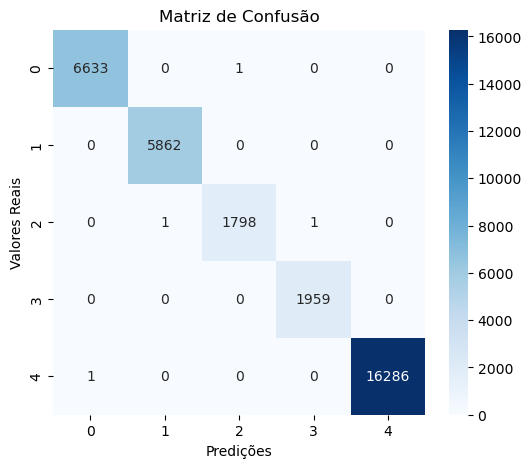

In [23]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = np.unique(y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()